In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
#!pip install seaborn
import seaborn as sns

In [66]:
path = ''
file = 'Life Expectancy Data.csv'

df = pd.read_csv(path + file)
df = df.dropna()

df = df.rename(columns={'Life expectancy ': 'Life expectancy'})

#replace string atributes with numbers
df['Status'] = df['Status'].replace('Developed', 1.0)
df['Status'] = df['Status'].replace('Developing', 0.0)

#X = df[df['Year'] == '2010']
X = df.drop(['Country'], axis=1)

# Select the dependent variable
y = df['Status'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(200,200, 200), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [76]:
#train the NN
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 53251198984720401360309286946308512497844836644944041119545367077396824122330865745114013540276427989288340718968149122248382266854330516017980665679014278464566625254744825200900314121767706801800303786134996568646281849956053124891569675275037321649470460704941792034816.00000000
Iteration 2, loss = 31639973609137845341919724595614287168467208959666401978170945621281363270477722622104670391204381671366431336030911647106795996441494315524208678164125617062562003162949487158520877261067353539598525250452901484187523628085307231154088121895182417854113003178433967733218065996840960.00000000
Iteration 3, loss = 549239342946269884433713261547617553223440215821248416899857750498306736995902711944907475414958012955950389998224350161682234032645135493960515830583552526861648405492961927845973499429442354542693833285295847960514850004384426647844724979911276752461818924486516305443118206859345920.00000000
Iteration 4, loss = 1191584347191638110372807901146540146744339800346

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

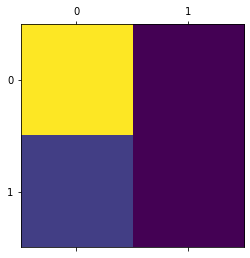

In [77]:
# STEP 3.2

# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

print(y_pred)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

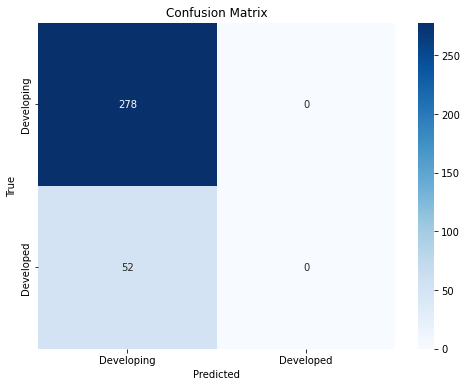

In [78]:
# Define the class labels
class_labels = ['Developing', 'Developed']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()